In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Data

In [198]:
Gapminder_df = pd.read_csv('C:/Users\Admin\Downloads\gapminder_full.csv')

In [ ]:
# Data Frame

In [199]:
Gapminder_df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [ ]:
# No. of countries

In [200]:
Gapminder_df['country'].nunique()

142

In [ ]:
# Create a pivot table that shows the average life expectancy for each continent and year.
# Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [202]:
Avg_Life_Expectancy = pd.pivot_table(Gapminder_df, values = 'life_exp', index = 'continent', columns = 'year')
Avg_Life_Expectancy

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


In [ ]:
# Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [203]:
gdp_higher_than_75th_percentile = Gapminder_df[Gapminder_df['gdp_cap']> Gapminder_df['gdp_cap'].quantile(0.75)]
gdp_higher_than_75th_percentile_for_2007 = gdp_higher_than_75th_percentile[gdp_higher_than_75th_percentile['year'] == 2007]

countries_with_higher_than_75th_percentile = gdp_higher_than_75th_percentile_for_2007['country']
countries_with_higher_than_75th_percentile

59                Argentina
71                Australia
83                  Austria
95                  Bahrain
119                 Belgium
167                Botswana
191                Bulgaria
251                  Canada
287                   Chile
359              Costa Rica
383                 Croatia
407          Czech Republic
419                 Denmark
491       Equatorial Guinea
527                 Finland
539                  France
551                   Gabon
575                 Germany
599                  Greece
671        Hong Kong, China
683                 Hungary
695                 Iceland
731                    Iran
755                 Ireland
767                  Israel
779                   Italy
803                   Japan
851             Korea, Rep.
863                  Kuwait
875                 Lebanon
911                   Libya
947                Malaysia
983               Mauritius
995                  Mexico
1091            Netherlands
1103            New 

In [204]:
Gapminder_df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [ ]:
# Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'.
# Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [278]:
#Gapminder_df['life_exp'].describe()

In [206]:
bins = ['23', '38', '53', '68', '83']
Gapminder_df['life_exp_range']= pd.cut(Gapminder_df['life_exp'], bins = bins, labels = ['Low', 'Medium', 'High', 'Very High'])

Gapminder_df

,country,year,population,continent,life_exp,gdp_cap,life_exp_range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,High
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,High
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,Medium
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,Medium


In [12]:
# Identify the top 5 countries with the highest GDP per capita in 2007.
# Use a horizontal bar chart to display this data.

<Axes: title={'center': 'Top 5 Countries BY GDP FOR 2007'}, xlabel='GDP_CAP', ylabel='country'>

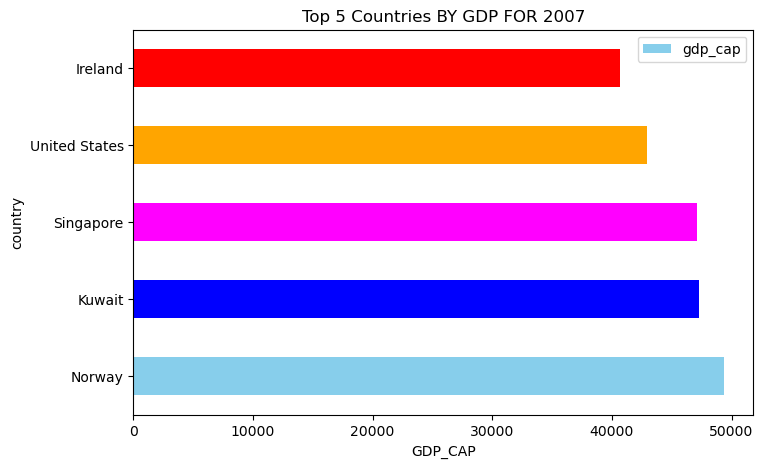

In [279]:
df_for_2007 = Gapminder_df[Gapminder_df['year'] == 2007]
top_5_countries_by_gdp = df_for_2007.nlargest(5, 'gdp_cap')

top_5_countries_by_gdp.plot.barh(x = 'country', y = 'gdp_cap', figsize = (8, 5), color = ['skyblue', 'blue', 'magenta', 'orange', 'red'], title = 'Top 5 Countries BY GDP FOR 2007', xlabel = 'GDP_CAP')

In [ ]:
# Find all country names that start with "I" and end with "a" using regex.

In [208]:
import re
countries = Gapminder_df['country']
def countries_starting_with_I_and_ending_with_a(countries):
    regex_pattern = r"^I.*a$"
    matching_countries = set()
    for i in countries:
        if re.match(regex_pattern, i):
            matching_countries.add(i)
    return matching_countries

countries_starting_with_I_and_ending_with_a(countries)

{'India', 'Indonesia'}

In [209]:
Gapminder_df.head()

,country,year,population,continent,life_exp,gdp_cap,life_exp_range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low


In [ ]:
# Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

Text(0, 0.5, 'GDP per capita')

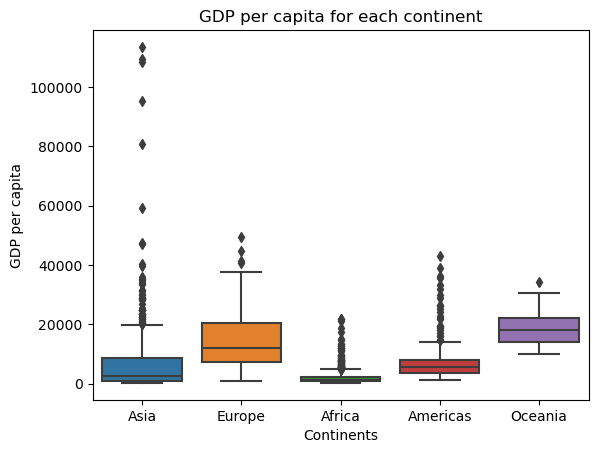

In [210]:
import seaborn as sns

continent = Gapminder_df['continent'].tolist()
gdp_cap = Gapminder_df['gdp_cap'].tolist()

sns.boxplot(x='continent', y='gdp_cap', data=Gapminder_df)
plt.title('GDP per capita for each continent')
plt.xlabel('Continents')
plt.ylabel('GDP per capita')

In [ ]:
# Find all countries with a life expectancy of over 80 years in 2007.
# List these countries and their respective continents.

In [211]:
high_life_exp_temp = Gapminder_df[Gapminder_df['life_exp']> 80]
high_life_exp = high_life_exp_temp[['country', 'continent']].drop_duplicates()

high_life_exp

,country,continent
70,Australia,Oceania
251,Canada,Americas
539,France,Europe
670,"Hong Kong, China",Asia
694,Iceland,Europe
767,Israel,Asia
778,Italy,Europe
801,Japan,Asia
1103,New Zealand,Oceania
1151,Norway,Europe


In [ ]:
# Convert the 'year' column to a datetime type and extract the decade.
# Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [212]:
Gapminder_df.head()

,country,year,population,continent,life_exp,gdp_cap,life_exp_range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low


In [213]:
Gapminder_df['year'] = pd.to_datetime(Gapminder_df['year'], format= '%Y')

Gapminder_df['year'] = Gapminder_df['year'].dt.year
Gapminder_df['decade'] = (Gapminder_df['year']//10*10).astype(str) + 's' 
Gapminder_df.head()

,country,year,population,continent,life_exp,gdp_cap,life_exp_range,decade
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low,1950s
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low,1950s
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low,1960s
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low,1960s
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low,1970s


In [215]:
Gapminder_df.head()

,country,year,population,continent,life_exp,gdp_cap,life_exp_range,decade
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low,1950s
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low,1950s
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low,1960s
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low,1960s
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low,1970s


In [ ]:
# Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset.
# Then, use Seaborn to visualize this correlation matrix as a heatmap

In [216]:
correlation_matrix = Gapminder_df[['gdp_cap', 'life_exp', 'population']].corr()

correlation_matrix

,gdp_cap,life_exp,population
gdp_cap,1.000000,0.583706,-0.025600
life_exp,0.583706,1.000000,0.064955
population,-0.025600,0.064955,1.000000


Text(0.5, 1.0, 'Correlation between GDP per capita, Life expectancy and Population')

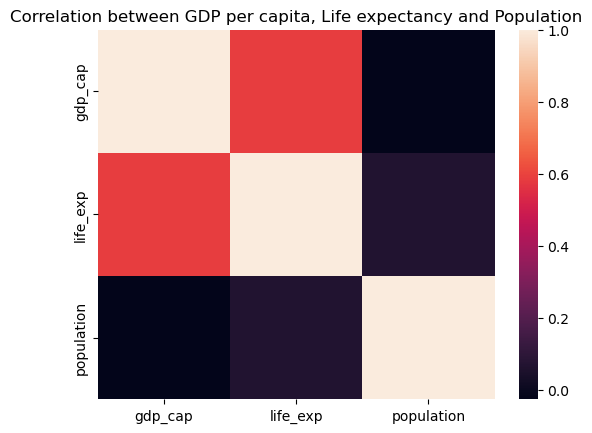

In [217]:
# Heat_map
sns.heatmap(correlation_matrix)
plt.title('Correlation between GDP per capita, Life expectancy and Population')

In [ ]:
# How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.

In [281]:
global_average_life_expectancy = Gapminder_df.groupby('year')['life_exp'].mean()

Text(0, 0.5, 'Life expectancy')

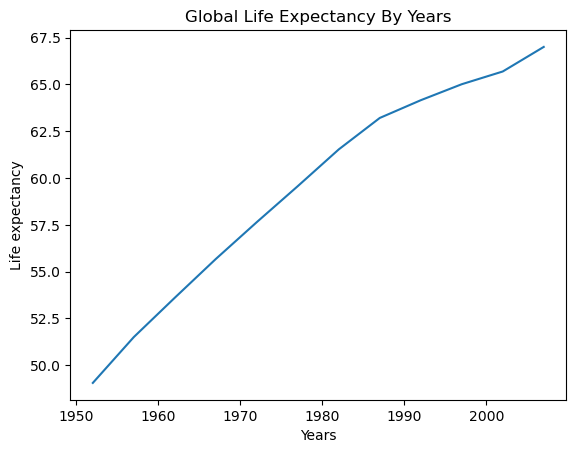

In [219]:
x = global_average_life_expectancy.index.tolist()
y = global_average_life_expectancy.values.tolist()

plt.plot(x, y)
plt.title("Global Life Expectancy By Years")
plt.xlabel('Years')
plt.ylabel('Life expectancy')


In [ ]:
# For the year 2007, analyze the relationship between life expectancy and GDP per capita. 

<Axes: xlabel='life_exp', ylabel='gdp_cap'>

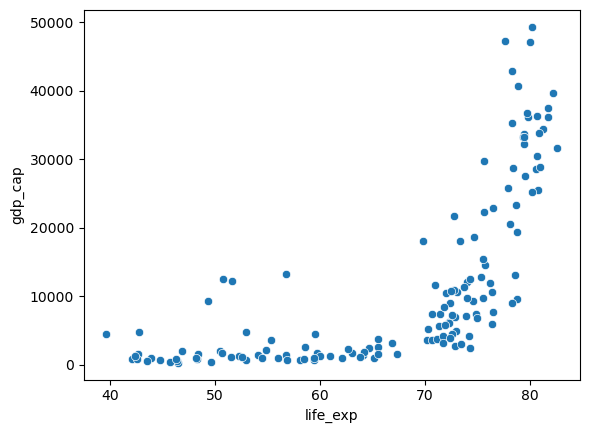

In [282]:
df_2007 = Gapminder_df[Gapminder_df['year'] == 2007]
sns.scatterplot(x = 'life_exp', y = 'gdp_cap', data = df_2007)

In [ ]:
# Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.

Text(0.5, 1.0, 'GDP by Continent')

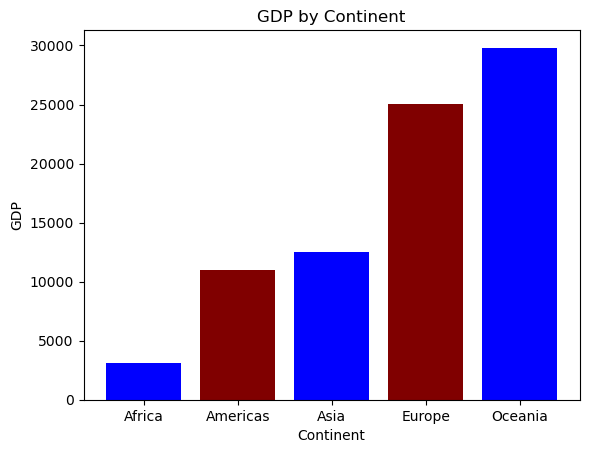

In [285]:
gdp_by_continents = df_2007.groupby('continent')['gdp_cap'].mean()
continents = gdp_by_continents.index.tolist()
gdp = gdp_by_continents.values.tolist()

plt.bar(continents, gdp, color = ['blue', 'maroon'])
plt.xlabel('Continent')
plt.ylabel('GDP')
plt.title('GDP by Continent')

In [ ]:
# Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts)
# and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
        # Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.
        # Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.

Text(0, 0.5, 'GDP')

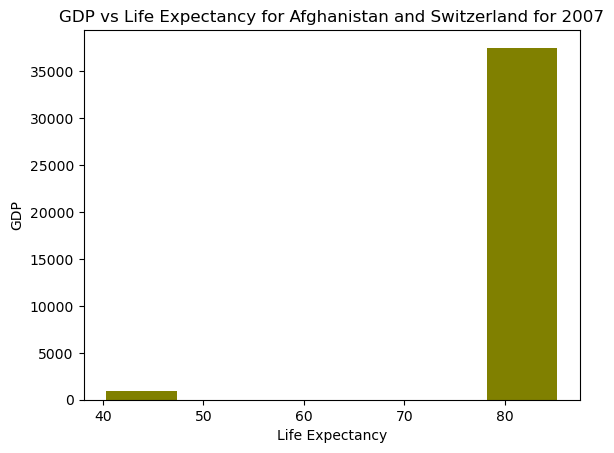

In [286]:
# Bar chart

Afg_Swit_2007 = df_2007[(df_2007['country'] == 'Afghanistan') | (df_2007['country'] == 'Switzerland')]

X_parameter = Afg_Swit_2007['life_exp'].values.tolist()
Y_parameter = Afg_Swit_2007['gdp_cap'].values.tolist()

plt.bar(X_parameter, Y_parameter, width = 7, color = 'Olive')
plt.title('GDP vs Life Expectancy for Afghanistan and Switzerland for 2007')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

In [ ]:
# Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.

In [287]:
afg_swiss_df = Gapminder_df[(Gapminder_df['country'].isin(['Afghanistan', 'Switzerland']))]

Text(0.5, 1.0, 'Life Expectancy Over Time')

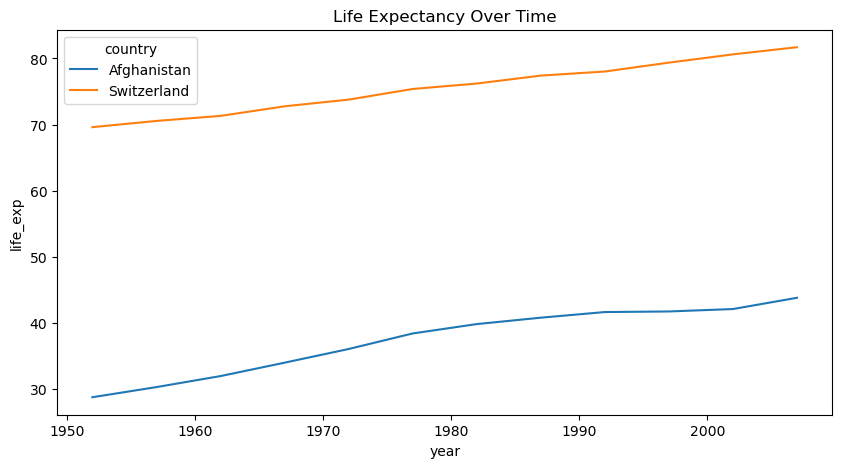

In [276]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='life_exp', hue='country', data=afg_swiss_df)
plt.title('Life Expectancy Over Time')

Text(0.5, 1.0, 'GDP per Capita Over Time')

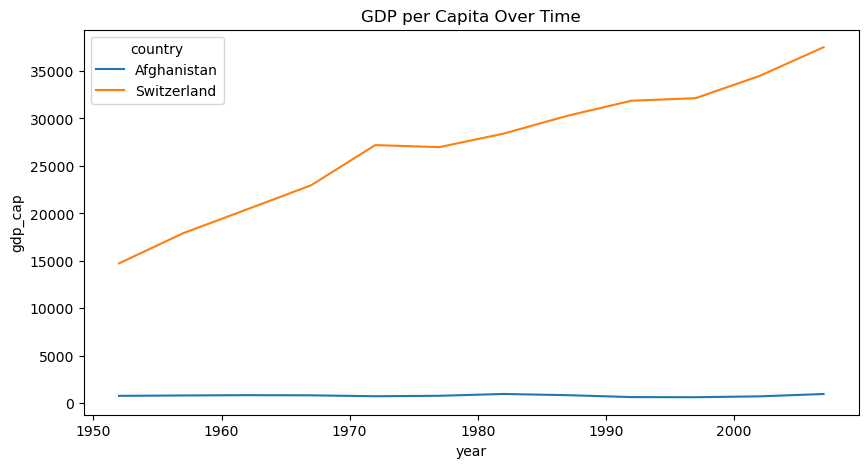

In [277]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='gdp_cap', hue='country', data=afg_swiss_df)
plt.title('GDP per Capita Over Time')